este es el clf --> MultinomialNB()
confusion matrix :  [[11, 34, 45], [9, 61, 69], [14, 79, 178]]
accuracy and recall 10s:  [0.3235294117647059, 0.12222222222222222]
accuracy and recall 20s:  [0.2932692307692308, 0.2663755458515284]
accuracy and recall 30s:  [0.356, 0.356]


este es el clf --> DecisionTreeClassifier(max_depth=10)


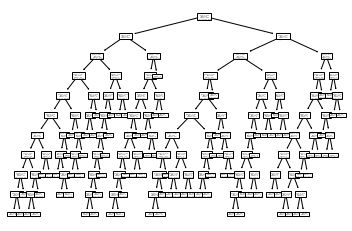

confusion matrix :  [[0, 1, 3], [10, 61, 56], [24, 112, 233]]
accuracy and recall 10s:  [0.0, 0.0]
accuracy and recall 20s:  [0.2932692307692308, 0.46564885496183206]
accuracy and recall 30s:  [0.466, 0.466]


este es el clf --> KNeighborsClassifier(n_neighbors=3)
confusion matrix :  [[2, 9, 16], [15, 105, 151], [17, 60, 125]]
accuracy and recall 10s:  [0.058823529411764705, 0.07407407407407407]
accuracy and recall 20s:  [0.5048076923076923, 0.3523489932885906]
accuracy and recall 30s:  [0.25, 0.25]


este es el clf --> MultinomialNB()
confusion matrix :  [[126, 119], [123, 132]]
accuracy and recall female:  [0.5060240963855421, 0.5142857142857142]
accuracy and recall male:  [0.264, 0.264]


este es el clf --> DecisionTreeClassifier(max_depth=10)


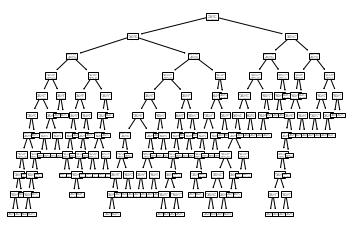

confusion matrix :  [[200, 157], [49, 94]]
accuracy and recall female:  [0.8032128514056225, 0.5602240896358543]
accuracy and recall male:  [0.188, 0.188]


este es el clf --> KNeighborsClassifier(n_neighbors=3)
confusion matrix :  [[101, 73], [148, 178]]
accuracy and recall female:  [0.40562248995983935, 0.5804597701149425]
accuracy and recall male:  [0.356, 0.356]




In [4]:
from description import data_base_age,data_base_gender
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from math import floor
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd

data_bases = [data_base_age,data_base_gender]
confusion_matrix = [[0,0,0],[0,0,0],[0,0,0]]
age_to_index ={'10s':0,'20s':1,'30s':2}
for index, data_base in enumerate(data_bases):
    

    training_rate = 0.9
    feature_matrix,class_list = data_base.get_feature_matrix(),data_base.get_class_list()
    classifier_methods = [
        MultinomialNB
        ,lambda:DecisionTreeClassifier(max_depth=10)
        #,lambda:RandomForestClassifier(max_depth=10)
        #,lambda:MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1,max_iter=500)
        ,lambda:KNeighborsClassifier(n_neighbors=3)
    ]

    plotting_fs = [lambda clf: None,lambda clf:tree.plot_tree(clf),lambda clf: None,lambda clf: None, lambda clf: None]

    for classifier_method,plotting_f in zip(classifier_methods,plotting_fs):
        clf = classifier_method()
        print('este es el clf -->',clf)
        training_length = floor(len(feature_matrix) * training_rate)

        clf.fit(feature_matrix[0:training_length],class_list[0:training_length])

        plotting_f(clf)
        plt.show()

        def get_accuracy_and_recall(confusion_matrix):
            denominator_accuracy = 0
            denominator_recall = 0
            numerator = 0
            results = []
            for position_class in range(len(confusion_matrix)):
                numerator = confusion_matrix[position_class][position_class]
                for position_other in range(len(confusion_matrix)):
                    denominator_accuracy += confusion_matrix[position_other][position_class]
                    denominator_recall += confusion_matrix[position_class][position_other]
                results.append([numerator/denominator_accuracy , numerator/denominator_recall])
            return results
        if(index==0):
            confusion_matrix = [[0,0,0],[0,0,0],[0,0,0]]
            age_to_index ={'10s':0,'20s':1,'30s':2}
        else:
            confusion_matrix = [[0,0],[0,0]]
            age_to_index ={'female':0,'male':1}

        for predicted_class,real_class in zip(clf.predict(feature_matrix[training_length:]),class_list[training_length:]):
            #print(predicted_class,real_class)
            pI,rI = age_to_index[predicted_class],age_to_index[real_class]
            confusion_matrix[pI][rI]+=1
        acc_and_rec = get_accuracy_and_recall(confusion_matrix)
        if(index == 0):
            print('confusion matrix : ',confusion_matrix)
            print('accuracy and recall 10s: ',acc_and_rec[0])
            print('accuracy and recall 20s: ',acc_and_rec[1])
            print('accuracy and recall 30s: ',acc_and_rec[2])
            print()
            print()
            save_confussion_matrix_age = [
                [''    ,        '10s predicted '         ,        '20s predicted'         ,      '30s predicted'           ],
                ['10s real' , confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[0][2]],
                ['20s real' , confusion_matrix[1][0],confusion_matrix[1][1],confusion_matrix[1][2]],
                ['30s real' , confusion_matrix[2][0],confusion_matrix[2][1],confusion_matrix[2][2]]
            ]
            pd.DataFrame(data = save_confussion_matrix_age).to_csv("ConfusionMatrixAge"+str(clf).split("(")[0]+".csv", index = False, header=False)

        else:
            print('confusion matrix : ',confusion_matrix)
            print('accuracy and recall female: ',acc_and_rec[0])
            print('accuracy and recall male: ',acc_and_rec[1])
            print()
            print()
            save_confussion_matrix_gender = [
                [''            ,        ' female predicted '         ,        'male predicted'       ],
                ['female real' ,         confusion_matrix[0][0]      ,     confusion_matrix[0][1]    ],
                ['male real  ' ,         confusion_matrix[1][0]      ,     confusion_matrix[1][1]    ]
            ]
            pd.DataFrame(data = save_confussion_matrix_gender).to_csv("ConfusionMatrixGender"+str(clf).split("(")[0]+".csv", index = False, header=False)




# #print(normalizedLines)